In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_path="C:\\Users\\Gokul\\Documents\\Plastic waste classification using CNN\\dataset\\TRAIN"
test_path="C:\\Users\\Gokul\\Documents\\Plastic waste classification using CNN\\dataset\\TEST"

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [4]:
from cv2 import cvtColor
x_data = []
y_data = [] 
for category in (glob(train_path+"/*")):
    for file in tqdm(glob(category+"/*")):
        img = cv2.imread(file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        x_data.append(img)
        y_data.append(category.split("/")[-1])  
data = pd.DataFrame({"image":x_data, "label":y_data})

100%|██████████| 9999/9999 [00:12<00:00, 813.71it/s] 


In [5]:
data.shape

(22564, 2)

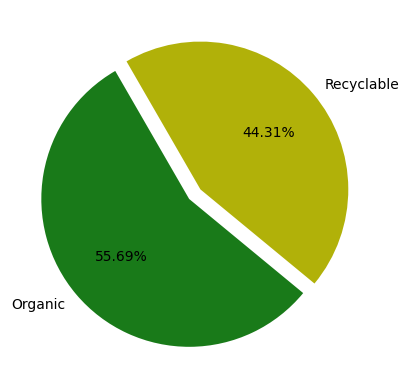

In [6]:
colors = ['#197a19', '#b1b109']
plt.pie(data.label.value_counts(), labels=['Organic', 'Recyclable'], autopct='%0.2f%%', colors=colors, startangle=120, explode=[0.05, 0.05])
plt.show()

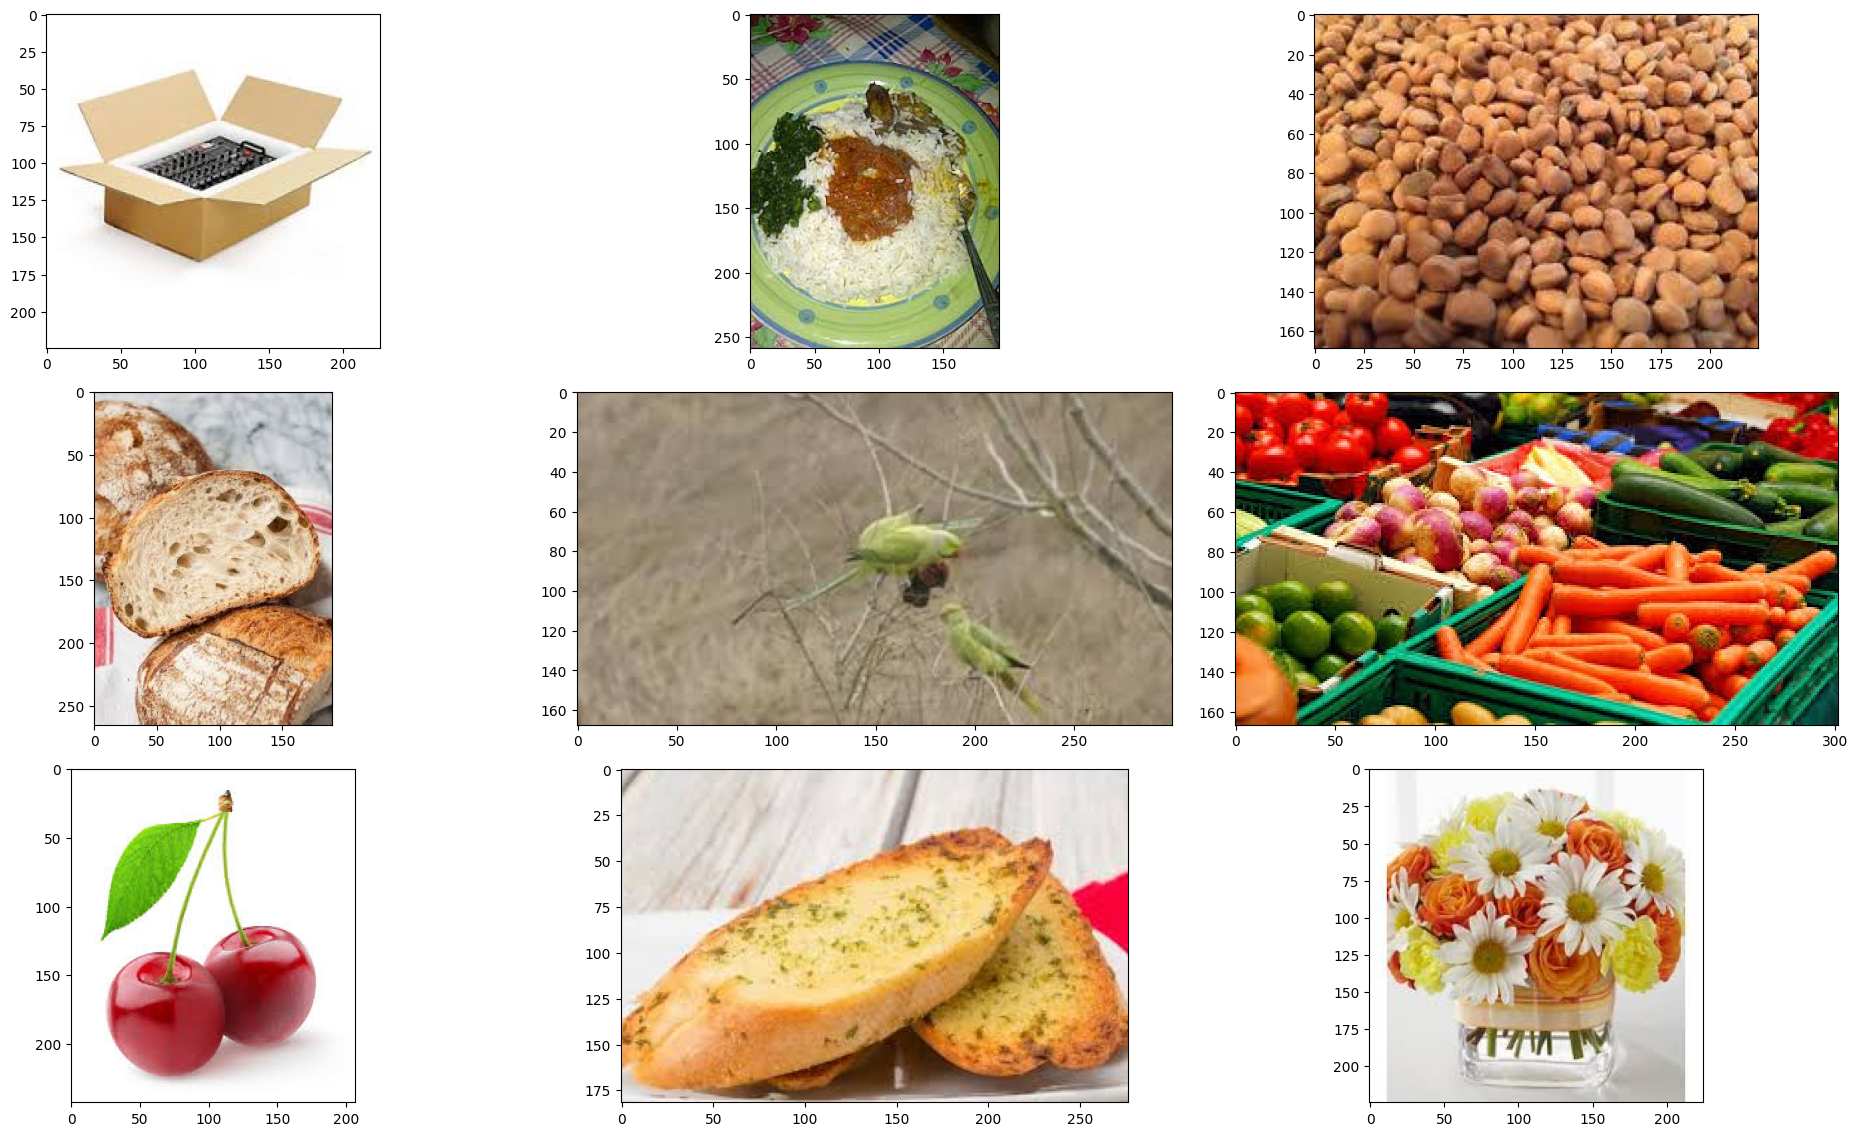

In [7]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4 ,3 , (i%12)+1)
    index = np.random.randint(15000)
    #plt.title('This is of{0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

In [8]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
batch_size = 16
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [11]:
print("Train generator batch shape:", next(iter(train_generator))[0].shape)
print("Test generator batch shape:", next(iter(test_generator))[0].shape)


Train generator batch shape: (16, 224, 224, 3)
Test generator batch shape: (16, 224, 224, 3)


In [12]:
print("Expected model input shape:", model.input_shape)


Expected model input shape: (None, 224, 224, 3)


In [13]:
hist=model.fit(train_generator, epochs = 10, validation_data = test_generator)

Epoch 1/10
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 658s 464ms/step - accuracy: 0.7774 - loss: 0.5140 - val_accuracy: 0.8436 - val_loss: 0.3946
Epoch 2/10
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 639s 453ms/step - accuracy: 0.8296 - loss: 0.4145 - val_accuracy: 0.8898 - val_loss: 0.2972
Epoch 3/10
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 641s 454ms/step - accuracy: 0.8631 - loss: 0.3467 - val_accuracy: 0.8619 - val_loss: 0.3423
Epoch 4/10
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 641s 454ms/step - accuracy: 0.8712 - loss: 0.3283 - val_accuracy: 0.8981 - val_loss: 0.2618
Epoch 5/10
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 641s 454ms/step - accuracy: 0.8911 - loss: 0.2855 - val_accuracy: 0.8985 - val_loss: 0.2801
Epoch 6/10
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 2226s 2s/step - accuracy: 0.8994 - loss: 0.2597 - val_accuracy: 0.9009 - val_loss: 0.3105
Epoch 7/10
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 636s 451ms/step - accuracy: 0.9165 - loss: 0.2270 - val_accuracy: 0.8997 - val_loss: 0.3478
Epoch 8/10
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 639s 453ms/step - accu

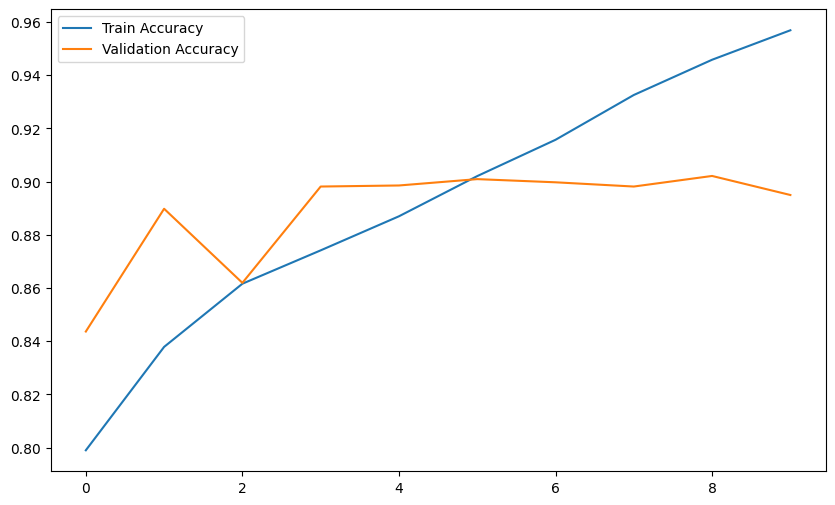

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.show()

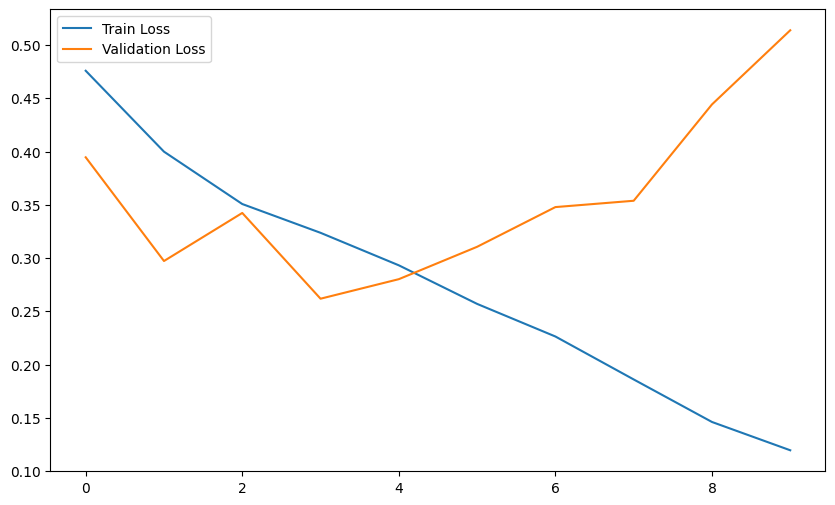

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()


In [29]:
def predict_fun(img):
    plt.figure(figsize=(6, 4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224, 3])
    result = np.argmax(model.predict(img))
    if result == 0:
        print("The image shown is Recyclable")
    elif result == 1:
        print("The image shown is Organic waste")
    #plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
The image shown is Organic waste


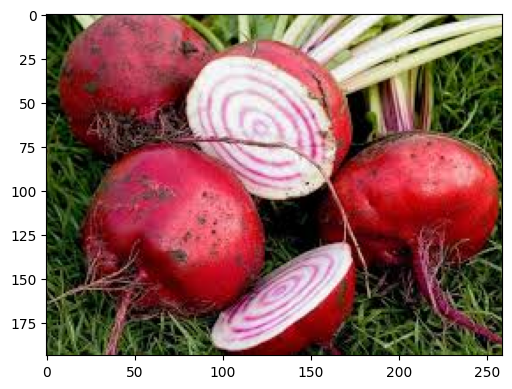

In [39]:
test_img = cv2.imread(r"C:\Users\Gokul\Documents\Plastic waste classification using CNN\dataset\TEST\O\O_13781.jpg")
predict_fun(test_img)